In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pedro2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
torch.cuda.set_device(1)

In [5]:
PATH = 'words/'
csv_path = PATH + 'csv_files/all.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

15993

In [6]:

arch = vgg19
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [7]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 131.5, 95.5, -0.5)

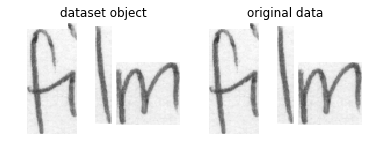

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [9]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/c03-000a-00-01.png']

In [10]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [11]:
learn = ConvLearner.pretrained(arch, data)

 89%|████████▉ | 178/200 [01:43<00:12,  1.73it/s, loss=14.6]

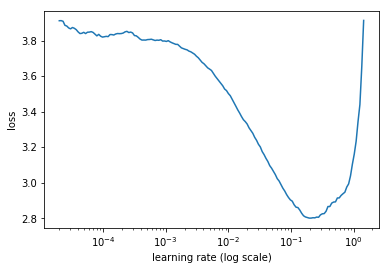

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

In [13]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.861565   1.474483   0.558787  
    1      1.577682   1.203502   0.622577                   
    2      1.427906   1.147029   0.646654                   
    3      1.433126   1.106014   0.642902                   
    4      1.35337    1.03306    0.676986                   
    5      1.281316   1.003924   0.683865                   
    6      1.239648   0.994312   0.682301                   


[array([0.99431]), 0.6823014385481042]

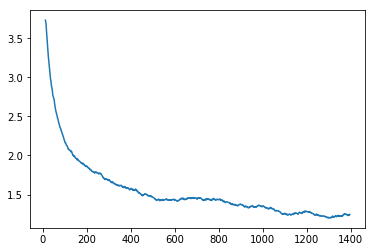

In [14]:
learn.sched.plot_loss()

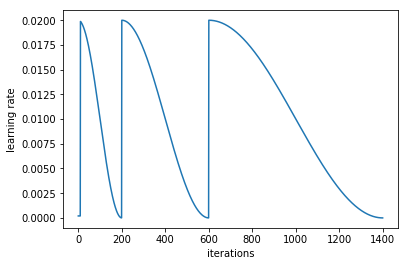

In [15]:
learn.sched.plot_lr()

In [16]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.587052   0.384451   0.882427  
    1      0.444218   0.304987   0.900563                    
    2      0.286139   0.234766   0.926204                    
    3      0.329544   0.26124    0.914634                    
    4      0.250264   0.214482   0.92808                     
    5      0.214324   0.184936   0.93965                     
    6      0.192259   0.178594   0.938712                    


[array([0.17859]), 0.9387116948465319]

In [17]:
learn.save(f'{sz}')

In [18]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [19]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [20]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 89%|████████▉ | 178/200 [01:08<00:08,  2.58it/s, loss=15.4]

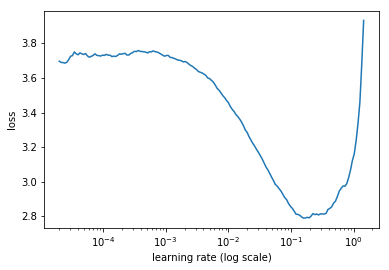

In [21]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [22]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.812849   1.45348    0.571295  
    1      1.601066   1.206621   0.62414                    
    2      1.428181   1.140288   0.656348                   
    3      1.428464   1.10036    0.65666                    
    4      1.36312    1.034265   0.678549                   
    5      1.249689   1.004107   0.689493                   
    6      1.225804   1.001123   0.688243                   


[array([1.00112]), 0.688242652067324]

In [23]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.580685   0.373296   0.878361  
    1      0.413173   0.302731   0.900563                    
    2      0.290258   0.235692   0.926829                    
    3      0.351616   0.368344   0.876798                    
    4      0.251891   0.225946   0.928705                    
    5      0.209262   0.182177   0.937148                    
    6      0.170877   0.176576   0.940588                    


[array([0.17658]), 0.9405878674544119]

In [24]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [25]:
accuracy_np(preds, y)

0.9490306441525954

In [26]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
accuracy_np(preds,y)

0.9540337711069419